Can Dai - DSC 478: Programming Machine Learning Applications - Final Project

### Part 1 - Data Analysis on Dataset


In [88]:
# Load the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the data
dataset = pd.read_table('Public_Corpus_Dataset.csv', delimiter=',',skiprows=0)
dataset

,label,subject,email_to,email_from,message
0,1,"Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca,"""Tomas Jacobs"" <RickyAmes@aol.com>",Content-Type: text/html;\nContent-Transfer-Enc...
1,0,Typo in /debian/README,debian-mirrors@lists.debian.org,Yan Morin <yan.morin@savoirfairelinux.com>,"Hi, i've just updated from the gulus and I che..."
2,1,authentic viagra,<the00@plg.uwaterloo.ca>,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...","Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,Nice talking with ya,opt4@speedy.uwaterloo.ca,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>","Hey Billy, \n\nit was really fun going out the..."
4,1,or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca,"""Christi T. Jernigan"" <dcube@totalink.net>",Content-Type: multipart/alternative;\n ...
...,...,...,...,...,...
75414,1,the reply for your request for a job place [le...,"""Gnitpick"" <gnitpick@flax9.uwaterloo.ca>","""Sydney Car Centre"" <Merrill8783@168city.com>",Content-Type: text/html;\nContent-Transfer-Enc...
75415,1,the reply for your request for a job place [le...,"""Gnitpick"" <gnitpick@flax9.uwaterloo.ca>","""Sydney Car Centre"" <Merrill8783@168city.com>",Content-Type: text/html;\nContent-Transfer-Enc...
75416,0,"Re: [R] Me again, about the horrible documenta...",Duncan Murdoch <murdoch@stats.uwo.ca>,Philippe Grosjean <phgrosjean@sciviews.org>,"For those who are interested, I just cook a li..."
75417,0,Re: [R] RODBC problem,<r-help@stat.math.ethz.ch>,=?iso-8859-1?Q?Bernhard_Wellh=F6fer?=\n\t<Bern...,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan..."


In [4]:
dataset.describe(include='all')

,label,subject,email_to,email_from,message
count,75419.000000,74626,74843,75419,73932
unique,NaN,33672,9340,47219,59047
top,NaN,Avis Important et Personnel,samba-cvs@samba.org,Groupe Desjardins / AccesD <services.de.cartes...,Cher(e) membre \n Desjardins/ A...
freq,NaN,2974,2396,2826,2606
mean,0.665602,NaN,NaN,NaN,NaN
std,0.471783,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN
50%,1.000000,NaN,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN,NaN


In [5]:
# spam dataset
spam_dataset = dataset.loc[:,['label','message']]
spam_dataset

,label,message
0,1,Content-Type: text/html;\nContent-Transfer-Enc...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,1,"Hey Billy, \n\nit was really fun going out the..."
4,1,Content-Type: multipart/alternative;\n ...
...,...,...
75414,1,Content-Type: text/html;\nContent-Transfer-Enc...
75415,1,Content-Type: text/html;\nContent-Transfer-Enc...
75416,0,"For those who are interested, I just cook a li..."
75417,0,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan..."


In [6]:
# checking null values in text
spam_dataset['message'].isna().sum()

1487

There are 1487 rows of messages that have a NA value. I will extract these rows from the dataset since the number is low and in addition, these rows won't add any value to SPAM detection purpose.

In [7]:
# Dropping Rows with NA message rows
spam_dataset.dropna(subset=['message'],inplace=True)
spam_dataset['message'].isna().sum()

0

In [8]:

# trimming the dataset
text_data = spam_dataset.loc[:,['message']]
text_data.columns = ['Text']
text_data

,Text
0,Content-Type: text/html;\nContent-Transfer-Enc...
1,"Hi, i've just updated from the gulus and I che..."
2,"Content-Type: text/plain;\n\tcharset=""iso-8859..."
3,"Hey Billy, \n\nit was really fun going out the..."
4,Content-Type: multipart/alternative;\n ...
...,...
75414,Content-Type: text/html;\nContent-Transfer-Enc...
75415,Content-Type: text/html;\nContent-Transfer-Enc...
75416,"For those who are interested, I just cook a li..."
75417,"Hello,\n\nas I wrote I call\n\n sqlFetch(chan..."


In [9]:
# Label 1 indicates SPAM, Label 0 indicates HAM
labels_data = spam_dataset.loc[:,['label']]
labels_data.columns = ['Labels']
labels_data

,Labels
0,1
1,0
2,1
3,1
4,1
...,...
75414,1
75415,1
75416,0
75417,0


In [10]:
### Visuals to understand the data better
spam_dataset_copy = spam_dataset
spam_dataset_copy['len'] = spam_dataset_copy['message'].apply(len)
spam_dataset_copy.head()

,label,message,len
0,1,Content-Type: text/html;\nContent-Transfer-Enc...,225
1,0,"Hi, i've just updated from the gulus and I che...",728
2,1,"Content-Type: text/plain;\n\tcharset=""iso-8859...",410
3,1,"Hey Billy, \n\nit was really fun going out the...",649
4,1,Content-Type: multipart/alternative;\n ...,17480


In [ ]:
spam_dataset_copy['len'].describe()

<AxesSubplot:ylabel='Frequency'>

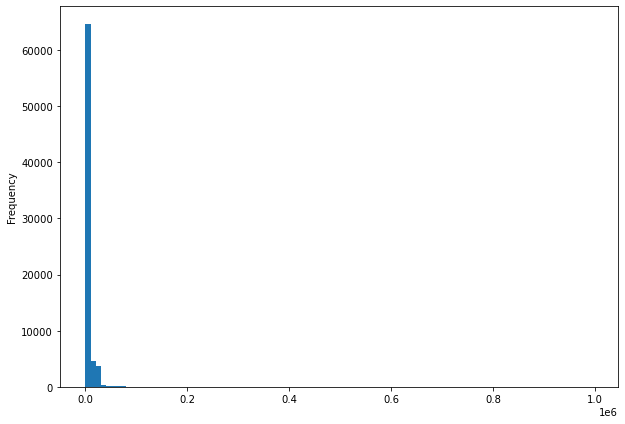

In [11]:
# Histogram of lengths of the emails
spam_dataset_copy['len'].plot(bins=100, kind='hist',figsize=(10,7))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

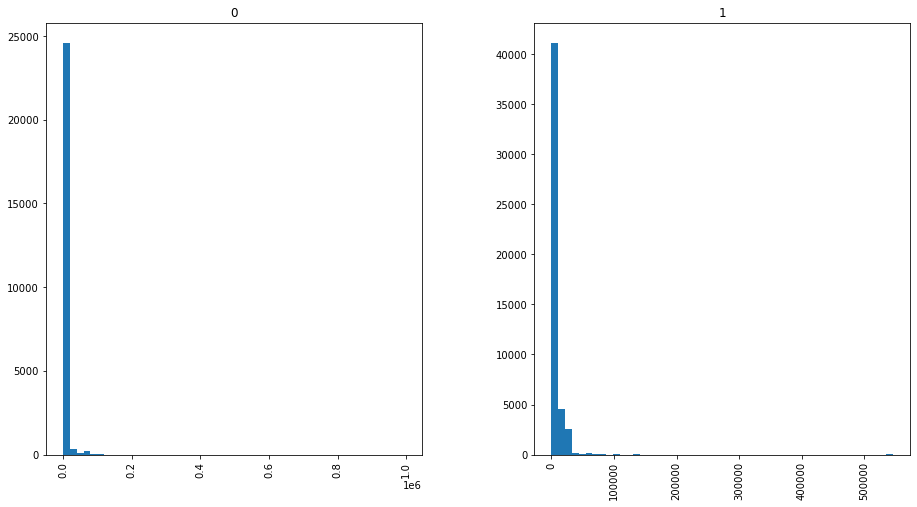

In [12]:
# Histogram of lenght of the emails compared by the labels
spam_dataset_copy.hist(column='len', by='label', bins=50, figsize=(15,8))

In [83]:
spam_dataset_copy['label'].value_counts()

1    48714
0    25218
Name: label, dtype: int64

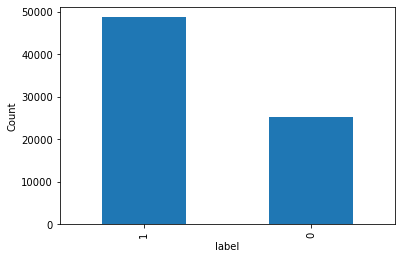

In [13]:
#Plotting value counts of SPAM and HAM
spam_dataset_copy['label'].value_counts().plot(kind='bar')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [14]:
# Split Data to Train and Test
text_train, text_test, label_train, label_test = train_test_split(spam_dataset['message'], spam_dataset['label'], test_size=0.2, random_state=111)

# resetting the index numbers of the datasets
text_train = text_train.reset_index(drop=True)
text_test = text_test.reset_index(drop=True)
label_train = label_train.reset_index(drop=True)
label_test = label_test.reset_index(drop=True)

In [15]:
text_train.head()

0    ==============================================...
1    social day fly thinking whos spot journey, end...
2    Content-Type: multipart/alternative;\n\tbounda...
3    -----BEGIN PGP SIGNED MESSAGE-----\nHash: SHA1...
4    buy now 100mg x 90 pills $159.95\nhttp://thusm...
Name: message, dtype: object

In [16]:
label_train.head()

0    0
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [17]:
text_test.head()

0    Dear all,\n\nI got this error message \n\n> li...
1    With hundreds of models to choose from, rock b...
2    Content-Type: multipart/alternative;\n\tbounda...
3    Content-Type: text/plain;\n        charset="wi...
4    Cher(e) membre \n                Desjardins/ A...
Name: message, dtype: object

In [18]:
label_test.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [19]:
### Conversion of the text data to TDIF per email form
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')


tfidf_matrix_text_train = tfidf.fit_transform(text_train)
tfidf_matrix_text_test = tfidf.transform(text_test)



In [20]:
tfidf_matrix_text_train

<59145x2540134 sparse matrix of type '<class 'numpy.float64'>'
	with 11662811 stored elements in Compressed Sparse Row format>

In [21]:
tfidf_matrix_text_train.shape

(59145, 2540134)

### Part II - Navie Bayes Classification for Text

In [22]:
from sklearn.naive_bayes import MultinomialNB

Naive_Bayes_model = MultinomialNB(alpha=1.5) 

Naive_Bayes_model.fit(tfidf_matrix_text_train,label_train)

MultinomialNB(alpha=1.5)

In [23]:
predicted_labels_NB = Naive_Bayes_model.predict(tfidf_matrix_text_test)
predicted_labels_NB

array([0, 1, 1, ..., 1, 0, 0])

In [56]:
# Confusin Matrix
cf_nb = confusion_matrix(label_test, predicted_labels_NB)
cf_nb

array([[4887,  169],
       [  32, 9699]])

<AxesSubplot:>

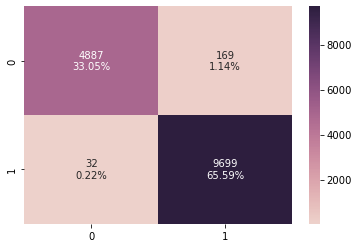

In [57]:
# Confusion Matrix Heatmap
group_counts = ["{0:0.0f}".format(value) for value in cf_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_nb.flatten()/np.sum(cf_nb)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_nb, annot=labels, fmt="", cmap=sns.cubehelix_palette(as_cmap=True))

In [54]:
print(classification_report(label_test, predicted_labels_NB))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5056
           1       0.98      1.00      0.99      9731

    accuracy                           0.99     14787
   macro avg       0.99      0.98      0.98     14787
weighted avg       0.99      0.99      0.99     14787



In [84]:
accuracy_score(label_test, predicted_labels_NB)

0.9864069791032664

### Part III - KNN

In [ ]:
# default=’minkowski’ => Euclidean distance
# p: int, default=2 (Euclidean), or p=1 (Manhattan)

In [35]:
# Optimizing KNN by finding the best K value using Euclidean

from sklearn.neighbors import KNeighborsClassifier

error_rate_euclidean = []

for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    # fit Train
    knn.fit(tfidf_matrix_text_train, label_train)
    # predict Test
    predicted_label_i_knn = knn.predict(tfidf_matrix_text_test)
    # Calculate error and add to error_rate list
    error_rate_euclidean.append(np.mean(predicted_label_i_knn != label_test))

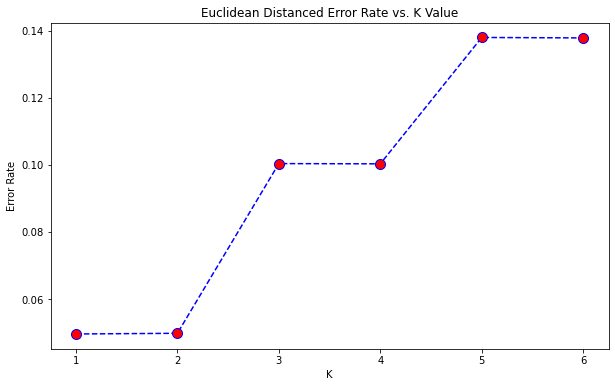

In [36]:
# Plotting K vs Error Rate Plot - Euclidean Distance
plt.figure(figsize=(10,6))
plt.plot(range(1,7), error_rate_euclidean,color ='blue', linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize=10)
plt.title('Euclidean Distanced Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [37]:
# Optimizing KNN by finding the best K value using Manhattan Distance

from sklearn.neighbors import KNeighborsClassifier

error_rate_manhattan = []

for i in range(1,7):
    knn = KNeighborsClassifier(n_neighbors=i, p=1)
    # fit Train
    knn.fit(tfidf_matrix_text_train, label_train)
    # predict Test
    predicted_label_i_knn = knn.predict(tfidf_matrix_text_test)
    # Calculate error and add to error_rate list
    error_rate_manhattan.append(np.mean(predicted_label_i_knn != label_test))

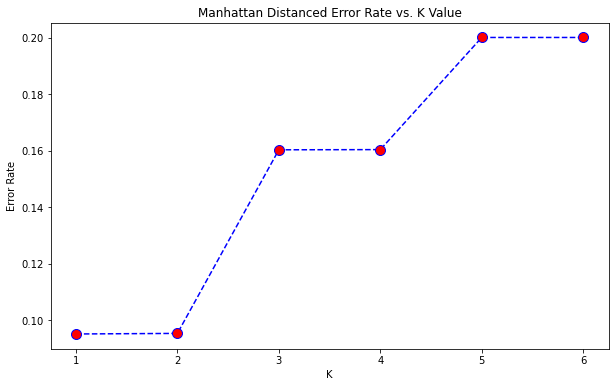

In [73]:
# Plotting K vs Error Rate Plot - Manhattan Distance
plt.figure(figsize=(10,6))
plt.plot(range(1,7),error_rate_manhattan,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Manhattan Distanced Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Comparing Results of K values and Distances

The plots above show that Euclidean distance measure metric have a lower error rate overall. Therefore Euclidean method is used. In addition, I decided to use K of 2 to continue classification since it has the lowest error rate.

In [40]:
# Getting the best K and Evaluation

#Fitting the KMM model
knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2)
# Train
knn_classifier.fit(tfidf_matrix_text_train, label_train)
# Precit
predicted_knn_classifier=knn_classifier.predict(tfidf_matrix_text_test)


In [43]:
# Evaluate
cf_KNN = confusion_matrix(label_test, predicted_knn_classifier)
cf_KNN

array([[4334,  722],
       [  14, 9717]])

<AxesSubplot:>

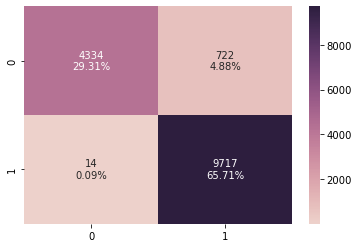

In [52]:
group_counts = ["{0:0.0f}".format(value) for value in cf_KNN.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_KNN.flatten()/np.sum(cf_KNN)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_KNN, annot=labels, fmt="", cmap=sns.cubehelix_palette(as_cmap=True))

In [58]:
print(classification_report(label_test, predicted_knn_classifier))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      5056
           1       0.93      1.00      0.96      9731

    accuracy                           0.95     14787
   macro avg       0.96      0.93      0.94     14787
weighted avg       0.95      0.95      0.95     14787



In [85]:
accuracy_score(label_test, predicted_knn_classifier)

0.9502265503482789

### Part V - Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_parameters = {"n_estimators":[100, 200, 500], "criterion" : ["gini", "entropy"]}

best_n_estimator = 0
best_score = 0
best_criterion = ""
i = 0
for crit in rf_parameters["criterion"]:
    for n in rf_parameters["n_estimators"]:
        i+=1
        print(i)
        
        random_forest_model = RandomForestClassifier(n_estimators = n, random_state = 111, criterion = crit)
        random_forest_model.fit(tfidf_matrix_text_train, label_train)
        labels_predicted_randomforest = random_forest_model.predict(tfidf_matrix_text_test)
        acc_score = accuracy_score(labels_predicted_randomforest,label_test)
        if acc_score > best_score:
            best_score = acc_score
            best_n_estimator = n
            best_criterion = crit
            
print("best_n_estimator:",best_n_estimator)
print("best_accuracy_score:",best_score)
print("best_criterion:",best_criterion)



1
2
3
4
5
6
best_n_estimator: 200
best_accuracy_score: 0.9940488266720768
best_criterion: gini


In [78]:
# Random Forest using the best parameters using above results

random_forest_model = RandomForestClassifier(n_estimators = best_n_estimator, random_state = 111, criterion = best_criterion)
# Train
random_forest_model.fit(tfidf_matrix_text_train, label_train)
# Precict labels
labels_predicted_randomforest = random_forest_model.predict(tfidf_matrix_text_test)
labels_predicted_randomforest

array([0, 1, 1, ..., 1, 0, 0])

In [80]:
cf_rf = confusion_matrix(label_test, labels_predicted_randomforest)
cf_rf

array([[5013,   43],
       [  45, 9686]])

<AxesSubplot:>

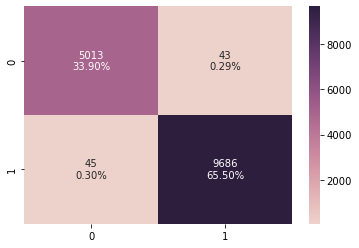

In [81]:
group_counts = ["{0:0.0f}".format(value) for value in cf_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_rf.flatten()/np.sum(cf_rf)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_rf, annot=labels, fmt="", cmap=sns.cubehelix_palette(as_cmap=True))

In [82]:
print(classification_report(label_test, labels_predicted_randomforest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5056
           1       1.00      1.00      1.00      9731

    accuracy                           0.99     14787
   macro avg       0.99      0.99      0.99     14787
weighted avg       0.99      0.99      0.99     14787



In [86]:
accuracy_score(label_test, labels_predicted_randomforest)

0.9940488266720768